In [1]:
import os
import numpy as np
import cv2
import random

In [2]:
from keras import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet_pi
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import keras

Using TensorFlow backend.


In [3]:
base_model = ResNet50(include_top=False, weights='imagenet',
                         input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
# base_model.summary()

/home/asus/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
x = base_model.output
x = Flatten(name='flatten', input_shape=base_model.output_shape)(x) 
x = Dropout(0.25)(x)
x = Dense(33, activation='softmax', name='predictions')(x)
model = Model(inputs=base_model.input, outputs=x)
# model.summary() # 1M trainable params...

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [7]:
train_generator = train_datagen.flow_from_directory(
        '/home/asus/Desktop/Dataset_splits/train/', 
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
)
validation_generator = validation_datagen.flow_from_directory(
        '/home/asus/Desktop/Dataset_splits/validation/',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
)

Found 22110 images belonging to 33 classes.
Found 4132 images belonging to 33 classes.


In [8]:

import tensorflow as tf


In [9]:
# do not rerun
t_steps = 22110 // 128
v_steps = 4132 // 128
history = model.fit_generator(train_generator, 
                              epochs=30, 
                              workers = 4,
                              use_multiprocessing=True,
                              steps_per_epoch=t_steps, 
                              validation_data=validation_generator,
                              validation_steps=v_steps,
                             )

Epoch 1/30
172/172 [==============================] - 2274s 13s/step - loss: 5.2494 - accuracy: 0.7280 - val_loss: 17.5499 - val_accuracy: 0.1169
Epoch 2/30
Epoch 1/30
172/172 [==============================] - 2061s 12s/step - loss: 2.9176 - accuracy: 0.8335 - val_loss: 24.1059 - val_accuracy: 0.0350
Epoch 3/30
172/172 [==============================] - 2075s 12s/step - loss: 3.0345 - accuracy: 0.8491 - val_loss: 28.6514 - val_accuracy: 0.0337
Epoch 4/30
172/172 [==============================] - 2045s 12s/step - loss: 2.9299 - accuracy: 0.8653 - val_loss: 28.9080 - val_accuracy: 0.0387
Epoch 5/30
172/172 [==============================] - 2259s 13s/step - loss: 2.8241 - accuracy: 0.8724 - val_loss: 30.6620 - val_accuracy: 0.0247
Epoch 6/30
172/172 [==============================] - 2044s 12s/step - loss: 2.9590 - accuracy: 0.8772 - val_loss: 45.7738 - val_accuracy: 0.0055
Epoch 7/30
172/172 [==============================] - 2064s 12s/step - loss: 2.8462 - accuracy: 0.8865 - val_loss

In [10]:
model.save('resnet_cropdisease.h5')

In [11]:
import matplotlib.pyplot as plt


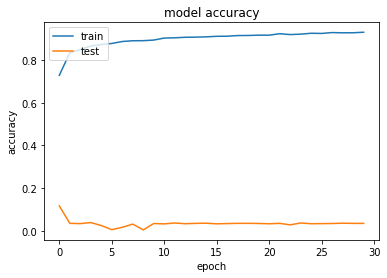

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

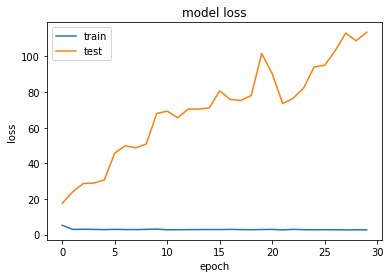

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()